In [1]:
!nvidia-smi

Tue Aug 17 01:21:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    31W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip list | grep torch

torch                         1.9.0+cu102
torchsummary                  1.5.1
torchtext                     0.10.0
torchvision                   0.10.0+cu102


In [4]:
import torch
import numpy as np

In [5]:
## 여러가지 기본 함수들

In [6]:
# torch의 arange
nums = torch.arange(9)

# torch의 shape
nums.shape

# torch의 numpy array
nums.numpy()

# torch의 reshape (.view()와 비슷)
nums.reshape(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [7]:
## 랜덤 행렬

In [8]:
randoms = torch.rand((3,3))
randoms

tensor([[0.5945, 0.0407, 0.4132],
        [0.6276, 0.4591, 0.2722],
        [0.8766, 0.6462, 0.4538]])

In [9]:
## 영행렬, 1인 행렬 만들기

In [10]:
zeros = torch.zeros((3,3))
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [11]:
ones = torch.ones((3,3))
ones

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [12]:
torch.zeros_like(ones)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [13]:
zeros.shape

torch.Size([3, 3])

In [14]:
nums * 3

tensor([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [15]:
nums = nums.reshape((3,3))

In [16]:
nums + nums

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])

In [17]:
## 연산 하기

In [18]:
result = torch.add(nums, 10)
result

tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

In [19]:
## 쉐입 바꾸기

In [20]:
range_nums = torch.arange(9).reshape((3,3))
range_nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [21]:
result.numpy()

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [22]:
range_nums.view(-1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [23]:
range_nums.view(1,9)

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [24]:
## 슬라이싱

In [25]:
nums[1]

tensor([3, 4, 5])

In [26]:
nums[1,1]

tensor(4)

In [27]:
nums[1:]

tensor([[3, 4, 5],
        [6, 7, 8]])

In [28]:
nums[1:, 1:]

tensor([[4, 5],
        [7, 8]])

In [29]:
## torch로 tensor 만들기

In [30]:
arr = np.array([1, 1, 1])
arr

array([1, 1, 1])

In [31]:
arr_torch = torch.from_numpy(arr)
arr_torch

tensor([1, 1, 1])

In [32]:
## 형태 변환

In [33]:
arr_torch.float()

tensor([1., 1., 1.])

In [34]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [35]:
# gpu 연산할 때 gpu로 보내는 방법
arr_torch.to(device)

tensor([1, 1, 1], device='cuda:0')

In [36]:
# 연산하고 다시 cpu로
arr_torch.to('cpu')

tensor([1, 1, 1])

In [37]:
# required_grad = True -> grad 계산할 때 업데이트를 하겠다는 것
x = torch.ones(2,2, requires_grad=True)

In [38]:
y = x+2

In [39]:
z = y*y*3
out = z.mean()

In [40]:
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [41]:
# out에 대한 x의 grad 구하기
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [42]:
x.requires_grad

True

In [43]:
y.requires_grad

True

In [44]:
with torch.no_grad():
    print((x**2).requires_grad)

False


In [45]:
from torchvision import datasets, transforms

In [46]:
batch_size = 32
test_batch_size = 32

In [47]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download=True,
                   transform = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize(mean=(0.5, ), std=(0.5, ))
                   ])),
                   batch_size=batch_size,
                   shuffle=True

)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [48]:
images, labels = next(iter(train_loader))

In [49]:
images.shape

torch.Size([32, 1, 28, 28])

In [50]:
labels.shape

torch.Size([32])

In [51]:
import matplotlib.pyplot as plt

In [52]:
images[0].shape

torch.Size([1, 28, 28])

In [54]:
# 차원 1인 것 날려줌
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [55]:
image = torch_image.numpy()
image.shape

(28, 28)

In [56]:
label = labels[0].numpy()

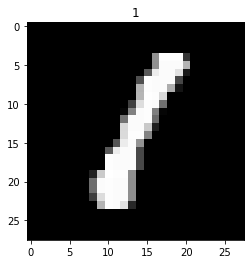

In [58]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()